# Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
data=pd.read_excel('CO2 dataset.xlsx',header=0, index_col=0, parse_dates=True)

In [3]:
data

,CO2
Year,
1800.0,0.00568
1801.0,0.00561
1802.0,0.00555
1803.0,0.00548
1804.0,0.00542
...,...
2010.0,15.60000
2011.0,15.60000
2012.0,14.80000


# Checking for null values.

In [4]:
data.isnull().sum()

CO2    0
dtype: int64

In [5]:
data.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


# Checking for Outliers

Text(0, 0.5, 'CO2 Emission')

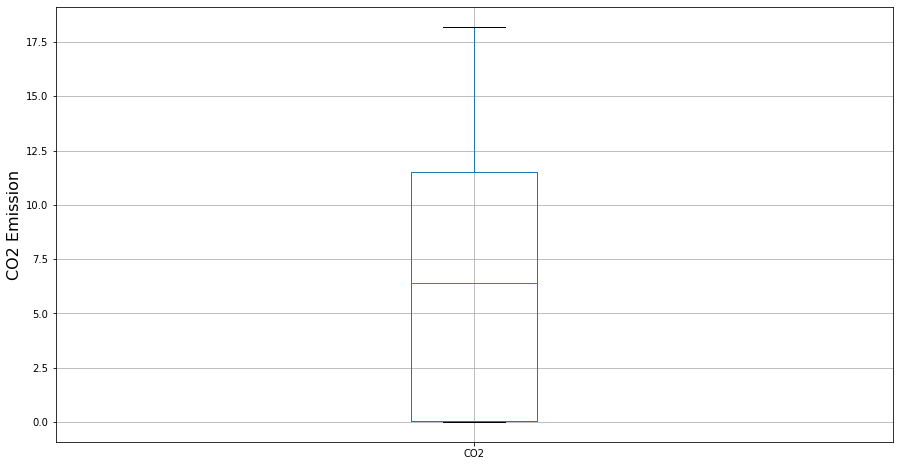

In [6]:
plt.figure(figsize=(15,8))
data.boxplot(column=['CO2'])
plt.ylabel('CO2 Emission',fontsize=16)

<Figure size 1080x576 with 0 Axes>

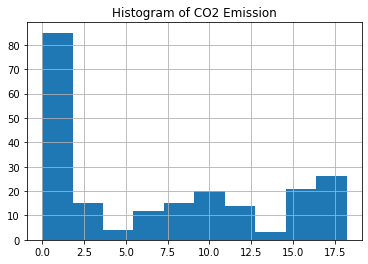

In [7]:
plt.figure(figsize=(15,8))
data.hist()
plt.title('Histogram of CO2 Emission')
plt.show()

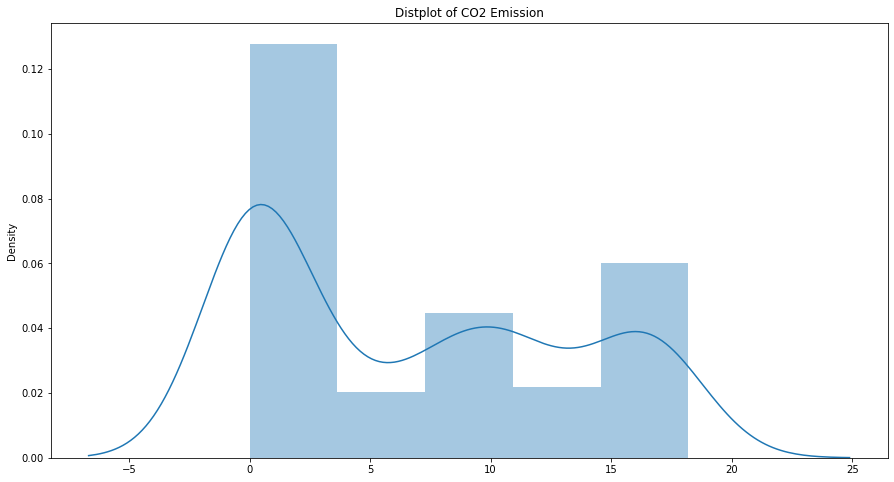

In [8]:
plt.figure(figsize=(15,8))
sns.distplot(data)
plt.title('Distplot of CO2 Emission')
plt.show()

<Figure size 1080x576 with 0 Axes>

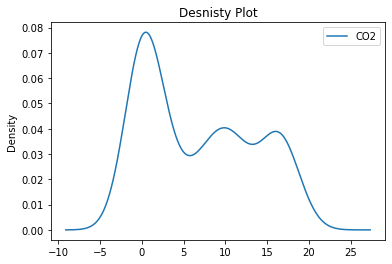

In [9]:
plt.figure(figsize=(15,8))
data.plot(kind='kde')
plt.title('Desnisty Plot')
plt.show()

# Checking Seasonality of data.

<AxesSubplot:xlabel='Year'>

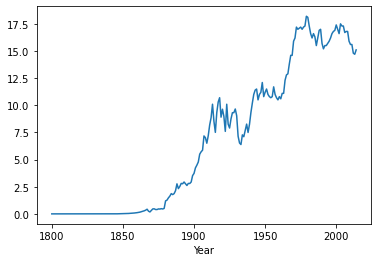

In [10]:
data.CO2.plot()

<AxesSubplot:xlabel='Year', ylabel='CO2'>

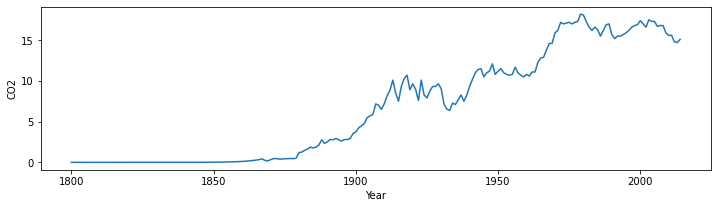

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="CO2",data=data)

# Time Series Decomposition Plots.

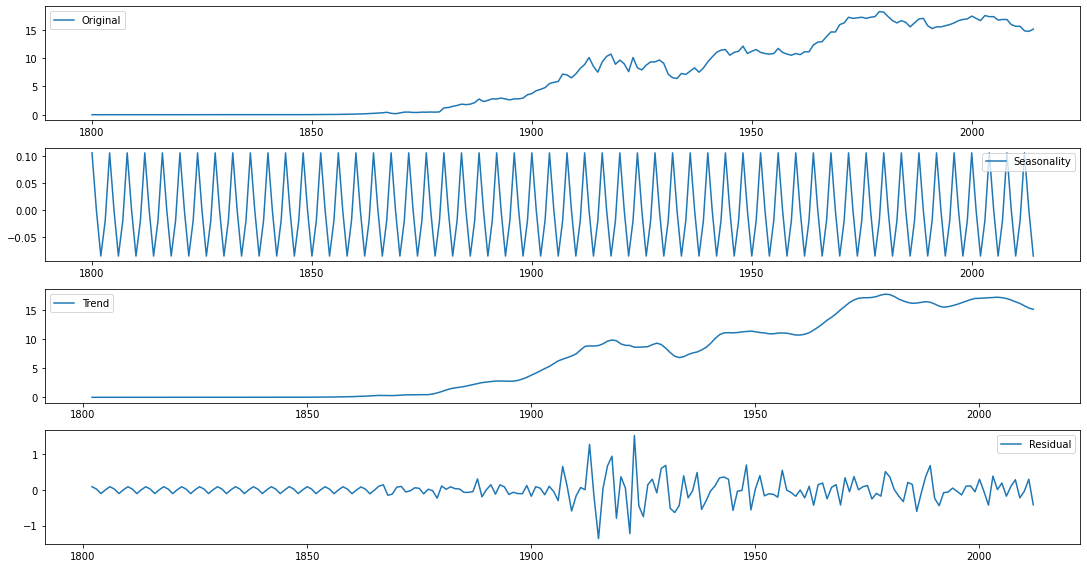

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(data.CO2,period=4)
seasonal=decompose.seasonal
trend=decompose.trend
resid=decompose.resid
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(data.CO2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid,label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Check whether data stationary or not.

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adftest=adfuller(data)
print("P value of Adfuller Test is:",adftest[1])

P value of Adfuller Test is: 0.9136330950336237


# The p value is greater then the significant value so that the data is not stationary.We need to make the data stationary.

In [15]:
data['CO2'].shift(1)

Year
1800.0         NaN
1801.0     0.00568
1802.0     0.00561
1803.0     0.00555
1804.0     0.00548
            ...   
2010.0    15.90000
2011.0    15.60000
2012.0    15.60000
2013.0    14.80000
2014.0    14.70000
Name: CO2, Length: 215, dtype: float64

In [16]:
data['CO2_difference']=data['CO2']-data['CO2'].shift(1)
data.head()

,CO2,CO2_difference
Year,,
1800.0,0.00568,NaN
1801.0,0.00561,-0.00007
1802.0,0.00555,-0.00006
1803.0,0.00548,-0.00007
1804.0,0.00542,-0.00006


In [17]:
adftest=adfuller(data['CO2_difference'].dropna())
print("P value of Adfuller Test is:",adftest[1])

P value of Adfuller Test is: 0.003118649594241994


# Now the data is stationary.

# ACF & PACF Plots.

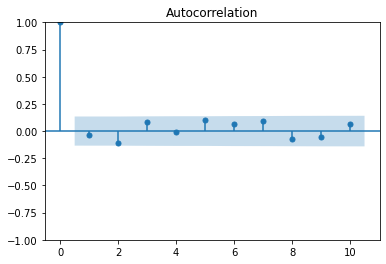

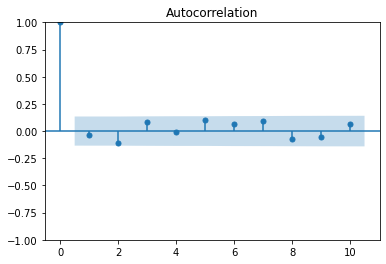

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.CO2_difference.dropna(),lags=10)

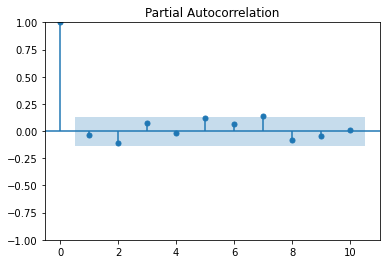

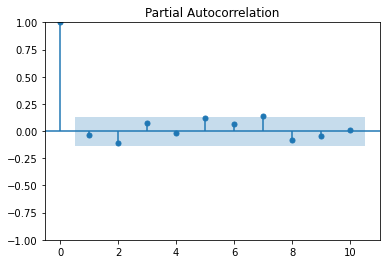

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.CO2_difference.dropna(),lags=10)

# Moving Average

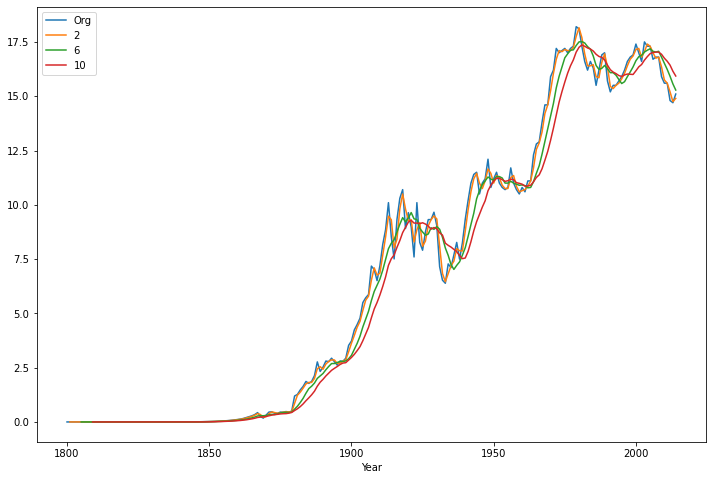

In [20]:
plt.figure(figsize=(12,8))
data.CO2.plot(label='Org')
for i in range(2,12,4):
    data['CO2'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')    